<a href="https://colab.research.google.com/github/adikalamaro/deep-learning-project-final/blob/main/deep_procjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import to_categorical, plot_model
import numpy
from numpy import argmax
from numpy import mean
from numpy import std
from numpy import expand_dims
from sklearn.metrics import accuracy_score
from keras.datasets.cifar10 import load_data
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
!pip install tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Importing**

In [ ]:
#install kaggle

!pip install -q kaggle

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mornataf","key":"7235f5a22a774d9911151b50915f62fc"}'}

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"pocoloco345","key":"a38897091bd1b43fbf47b3d0ce070214"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

100% 86.8M/86.8M [00:02<00:00, 40.3MB/s]
100% 86.8M/86.8M [00:02<00:00, 30.3MB/s]


In [ ]:
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

# **Data Preperation**

**Data Loading**

In [ ]:
# Multi label

labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X = []
y = []
image_size = 150

# Iterate over the files in the folder
for i in labels:
    folderPath = os.path.join('/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)  # Append the image array to the list of images
        y.append(i) # Append label name

# Iterate over the files in the folder
for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

100%|██████████| 74/74 [00:00<00:00, 78.41it/s]


In [ ]:
y.shape

(3264,)

**Visualization of the dataset**

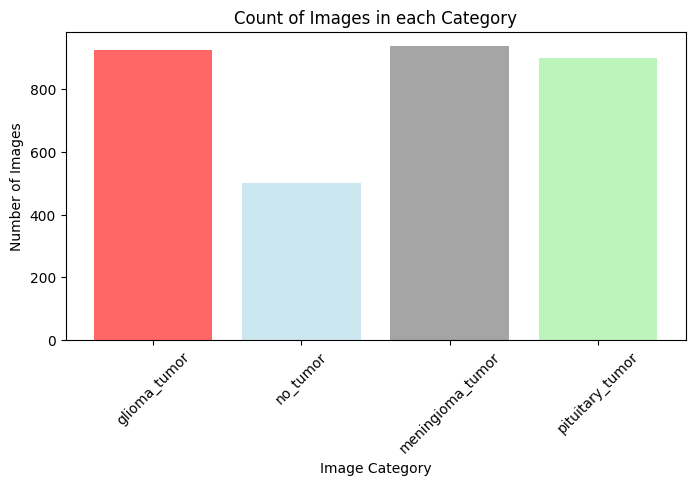

In [ ]:
# Create a bar chart

# Convert the NumPy array to a pandas Series
l = list(y)
category_sizes = np.array([l.count(j) for j in labels])
colors = ['red', 'lightblue', 'dimgrey', 'lightgreen']
plt.figure(figsize=(8, 4))
plt.bar(labels, category_sizes, color=colors, alpha=0.6)
plt.xlabel('Image Category')
plt.ylabel('Number of Images')
plt.title('Count of Images in each Category')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()



In [ ]:
#Shuffeling the images so won't be significant to oreder

X, y = shuffle(X,y, random_state=111)
print(X.shape)

(3264, 150, 150, 3)


**Data Cleaning**

In [ ]:
import os
from PIL import Image

def is_image_corrupted(image_path):
    try:
        Image.open(image_path).verify()
        return False
    except (IOError, SyntaxError):
        return True

def clean_image_dataset(dataset_dir):
    cleaned_dataset = []
    for root, _, filenames in os.walk(dataset_dir):
        for filename in filenames:
            image_path = os.path.join(root, filename)
            if not is_image_corrupted(image_path):
                cleaned_dataset.append(image_path)
            else:
                print(f"Corrupted image found: {image_path}")
    return cleaned_dataset

# Example usage:
# Assuming `dataset_dir` is the main directory path containing subfolders with images

# Clean the image dataset
cleaned_X = clean_image_dataset('/content/Training')
cleaned_y = clean_image_dataset('/content/Testing')

# Now, `cleaned_dataset` contains the paths of the valid, non-corrupted image files across all subfolders


! - We can see that the size of the total cleaned dataset is equal to the original one, so there is no corrupted images.

In [ ]:
print(len(cleaned_X)+len(cleaned_y))
print(X.shape[0])

3264
3264


**Splitting the Data**

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((2611, 150, 150, 3), (2611,))

**Pixel Normalization**

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_val= X_val.astype('float32')

In [ ]:
# We want the values to be between 0 to 1

X_train = X_train/255
X_test = X_test/255
# X_val = X_val/255

**Sample Images**

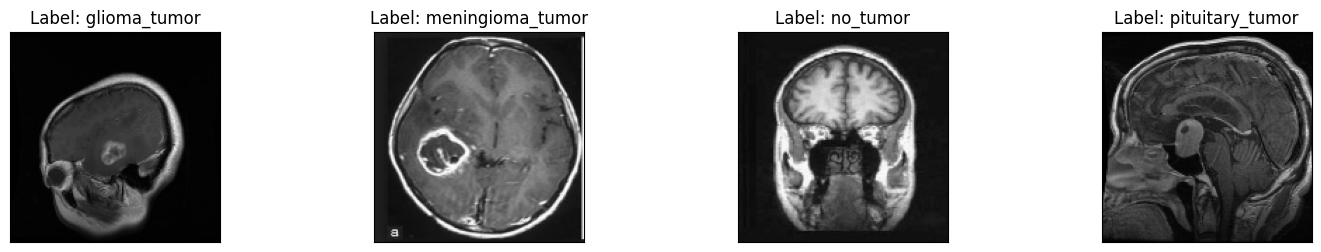

In [ ]:
import matplotlib.pyplot as plt

n = 4
categories = np.unique(y_test)  # Get unique categories from y_test

plt.figure(figsize=(18, 6))
for i, category in enumerate(categories):
    # Find the index of the first image in the current category
    category_indices = np.where(y_test == category)[0]
    first_image_index = category_indices[0]

    # Display the first image from the current category
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[first_image_index])
    plt.title(f'Label: {y_test[first_image_index]}')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


**Image Size - Resampling**

In [ ]:
import os
import cv2

def check_resample(dataset, target_size):
    resample_required = False
    for i in dataset:
        if (i.shape[0],i.shape[1]) != target_size:
                resample_required = True
                break
    return resample_required

resample_needed = check_resample(X_test, (150,150))

if resample_needed:
    print("Resampling is required.")
else:
    print("No resampling is needed.")


No resampling is needed.


In [ ]:
y_train.shape

(2611,)

**Categorial Target - Transformation**

We decided to use OnehotEncoder to numeric the target without giving significant values for the label categories.

In [ ]:
y_test.shape,y_train.shape

((653,), (2611,))

In [ ]:
y_train = y_train.reshape(-1, 1)  # Reshape to a column vector
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(y_train)
y_train = one_hot_encoder.transform(y_train).toarray()

# y_val = y_val.reshape(-1, 1)  # Reshape to a column vector
# one_hot_encoder = OneHotEncoder()
# one_hot_encoder.fit(y_val)
# y_val = one_hot_encoder.transform(y_val).toarray()

In [ ]:
y_test = y_test.reshape(-1, 1)  # Reshape to a column vector
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(y_test)
y_test = one_hot_encoder.transform(y_test).toarray()

In [ ]:
y_train.shape, y_test.shape

((2611, 4), (653, 4))

**Data Augmentation**

We want to generate additional training examples by applying random transformations like rotations, translations, and flips to the existing images. This helps increase the model's robustness and generalization.

In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

datagen.fit(X_train)

# Flow and augment the images from the training set
train_generator = datagen.flow(X_train, y_train, batch_size=32)


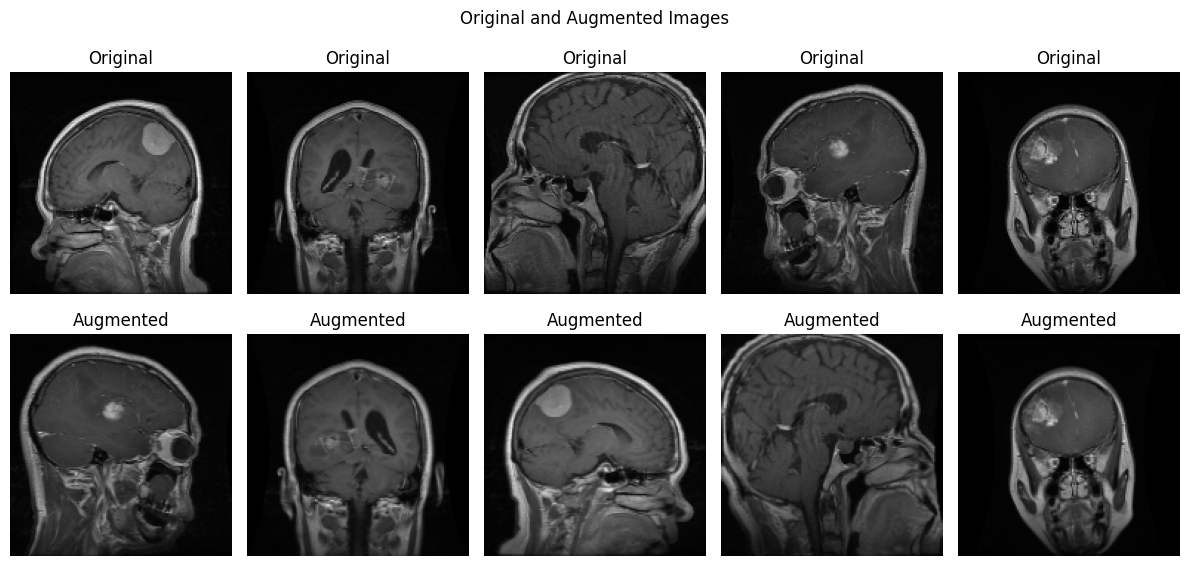

In [ ]:
# Generate augmented images from a subset of the original data
augmented_images = datagen.flow(X_train[:5], batch_size=1)

# Display the original and augmented images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Original and Augmented Images')

# Display original images
for i in range(5):
    axs[0, i].imshow(X_train[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Original')

# Display augmented images
for i in range(5):
    augmented_image = next(augmented_images)[0]
    axs[1, i].imshow(augmented_image.squeeze(), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Augmented')

plt.tight_layout()
plt.show()

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this to display images in Colab

def apply_otsu_threshold_with_roi(image_path, roi_coords):
    # Load the MRI brain image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Error loading the image. Please check the file path.")

    # Unpack the ROI coordinates
    roi_x, roi_y, roi_width, roi_height = roi_coords

    # Ensure the ROI coordinates are integers and within valid image dimensions
    roi_x, roi_y = int(roi_x), int(roi_y)
    roi_width, roi_height = int(roi_width), int(roi_height)

    # Crop the image to retain only the ROI
    roi_image = image[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

    # Apply Otsu's thresholding to the ROI
    _, binary_mask = cv2.threshold(roi_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    if binary_mask is None:
        raise ValueError("Error applying Otsu's thresholding. The ROI might be too uniform.")

    return binary_mask

if __name__ == "__main__":
    # Replace 'path/to/your/image.jpg' with the actual path to your MRI brain image
    image_path = 'path/to/your/image.jpg'

    # Assuming the tumor is small and occupies a region at the center of the 155x155 image
    tumor_size = 30
    roi_x = (155 // 2) - (tumor_size // 2)
    roi_y = (155 // 2) - (tumor_size // 2)

    # Define the ROI coordinates as (x, y, width, height)
    roi_coords = (roi_x, roi_y, tumor_size, tumor_size)

    try:
        # Apply Otsu's method for thresholding within the ROI
        binary_mask = apply_otsu_threshold_with_roi(image_path, roi_coords)

        # Display the original image and the binary mask side by side
        original_image = cv2.imread(image_path)
        roi_mask = np.zeros_like(original_image)
        roi_mask[roi_y:roi_y + tumor_size, roi_x:roi_x + tumor_size] = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
        stacked_images = np.hstack((original_image, roi_mask))

        cv2_imshow(stacked_images)  # Use this instead of cv2.imshow() in Colab
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except Exception as e:
        print(f"An error occurred: {str(e)}")


An error occurred: Error loading the image. Please check the file path.


# **Model 1 - CNN**

**Architacture**

In [ ]:
def define_model() :
  model = tf.keras.Sequential()

  # Convolutional layers (conv, pooling, dropout)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))  # Increased dropout

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))  # Increased dropout

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))  # Increased dropout

  # Flatten the feature maps
  model.add(layers.Flatten())

  # Fully connected layers with L2 regularization
  from tensorflow.keras.regularizers import l2
  model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Added L2 regularization
  model.add(layers.Dropout(0.5))  # Increased dropout

  model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # Added L2 regularization
  model.add(layers.Dropout(0.5))  # Increased dropout

  # Output layer for multi-class classification
  model.add(layers.Dense(4, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
from sklearn.model_selection import KFold

# Model configuration
batch_size = 32
no_epochs = 15
verbosity = 1
num_folds = 3

#save the model history in a list after fitting so that we can plot later
model_history = []

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  model = define_model()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  model_history.append
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              validation_split=0.1,
              verbose=verbosity)

  model_history.append(history)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
62/62 [==============================] - 21s 49ms/step - loss: 2.4798 - accuracy: 0.3524 - val_loss: 1.8170 - val_accuracy: 0.4725
Epoch 2/15
62/62 [==============================] - 2s 29ms/step - loss: 1.6385 - accuracy: 0.4254 - val_loss: 1.4645 - val_accuracy: 0.4679
Epoch 3/15
62/62 [==============================] - 2s 25ms/step - loss: 1.4066 - accuracy: 0.4934 - val_loss: 1.2159 - val_accuracy: 0.5872
Epoch 4/15
62/62 [==============================] - 2s 25ms/step - loss: 1.2886 - accuracy: 0.5174 - val_loss: 1.1112 - val_accuracy: 0.6697
Epoch 5/15
62/62 [==============================] - 2s 25ms/step - loss: 1.2206 - accuracy: 0.5761 - val_loss: 1.0990 - val_accuracy: 0.6376
Epoch 6/15
62/62 [==============================] - 2s 26ms/step - loss: 1.1596 - accuracy: 0.5741 - val_loss: 0.9870 - val_accuracy: 0.6789
Epoch 7/15
62/62 [==============================] - 2s 3

In [ ]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy''], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy''], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy''], label='Training Fold 3')
plt.legend()
plt.show()

SyntaxError: ignored

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 37, 37, 64)       

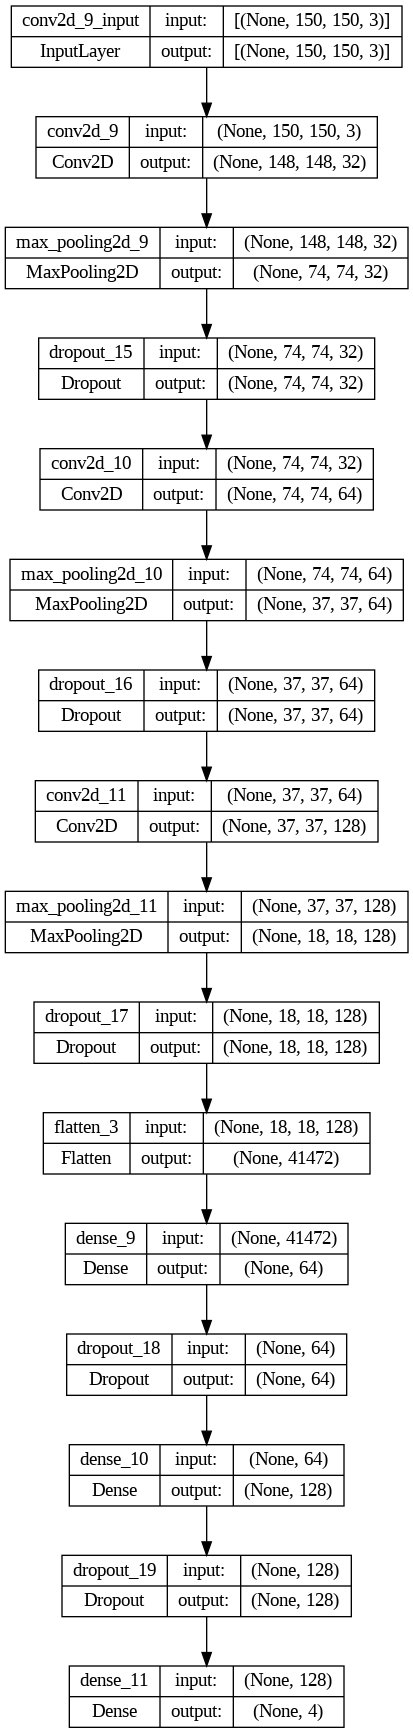

In [ ]:
plot_model(model,  show_layer_names=True, show_shapes=True)

In [ ]:
#Plot training and validation loss for the average fold

plt.figure(figsize=(10, 6))
plt.plot(train_loss_best_fold, label='Training Loss (Best Fold)')
plt.plot(val_loss_best_fold, label='Validation Loss (Best Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for the Best Fold')
plt.show()

# Plot training and validation accuracy for the best fold
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_best_fold, label='Training Accuracy (Best Fold)')
plt.plot(val_accuracy_best_fold, label='Validation Accuracy (Best Fold)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for the Best Fold')
plt.show()

print(f"Best Fold: {best_fold + 1} with Validation Accuracy: {best_val_accuracy}")

NameError: ignored

<Figure size 1000x600 with 0 Axes>

**Fitting**

**fit with augmanitaion**

In [ ]:
model_ag = define_model()

In [ ]:
history_ag = model_ag.fit_generator(train_generator,
                              epochs=no_epochs,
                              steps_per_epoch=len(X_train)/batch_size)

Epoch 1/15


<ipython-input-49-baebc3a32f40>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



81/81 [==============================] - 16s 168ms/step - loss: 2.2344 - accuracy: 0.3386
Epoch 2/15
81/81 [==============================] - 14s 167ms/step - loss: 1.5517 - accuracy: 0.4282
Epoch 3/15
81/81 [==============================] - 15s 185ms/step - loss: 1.3547 - accuracy: 0.4868
Epoch 4/15
81/81 [==============================] - 14s 167ms/step - loss: 1.2585 - accuracy: 0.4971
Epoch 5/15
81/81 [==============================] - 14s 167ms/step - loss: 1.2231 - accuracy: 0.5075
Epoch 6/15
81/81 [==============================] - 15s 185ms/step - loss: 1.2043 - accuracy: 0.5297
Epoch 7/15
81/81 [==============================] - 14s 168ms/step - loss: 1.1522 - accuracy: 0.5642
Epoch 8/15
81/81 [==============================] - 14s 174ms/step - loss: 1.1486 - accuracy: 0.5783
Epoch 9/15
81/81 [==============================] - 14s 166ms/step - loss: 1.0947 - accuracy: 0.6002
Epoch 10/15
81/81 [==============================] - 14s 165ms/step - loss: 1.0908 - accuracy: 0.6212


In [ ]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 0s 8ms/step - loss: 0.9072 - accuracy: 0.6738


[0.90716952085495, 0.6738131642341614]

**Test Time Augmentation**

In [ ]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model_ag.predict_generator(datagen.flow(X_test, batch_size=batch_size, shuffle=False), steps = X_test.shape[0]/batch_size)
    predictions.append(preds)

pred = np.mean(predictions, axis=0)

np.mean(np.equal(np.argmax(y_test, axis=-1), np.argmax(pred, axis=-1)))

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-51-3b0dc0341a06>:5: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.

100%|██████████| 10/10 [00:36<00:00,  3.67s/it]


0.7075038284839203

# **Transfer Learning**

In [ ]:
import tensorflow as tf

# Assuming you have loaded your images and labels into X_train and y_train

# Resize images to (224, 224)
X_train_resized = tf.image.resize(X_train, (224, 224))
X_test_resized = tf.image.resize(X_test, (224, 224))

# Convert image datatype to float32
X_train_resized = tf.cast(X_train_resized, tf.float32)
X_test_resized = tf.cast(X_test_resized, tf.float32)

# Perform per-image standardization (subtract mean and divide by standard deviation)
X_train_resized = tf.image.per_image_standardization(X_train_resized)
X_test_resized = tf.image.per_image_standardization(X_test_resized)

# Check the shape of the resized images
print("Training images shape:", X_train_resized.shape)  # (num_samples, 224, 224, 3)


Training images shape: (2611, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model (without the top classifier)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze some layers
for layer in base_model.layers[:10]:
    layer.trainable = False

# Replace the classifier
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the modified model
model_vgg = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:

# Set batch size and number of epochs
batch_size = 32
epochs = 10

# Train your model using the fit method
model_vgg.fit(
    X_train_resized, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/10
74/74 [==============================] - 13s 97ms/step - loss: 1.5636 - accuracy: 0.3819 - val_loss: 1.2249 - val_accuracy: 0.4924
Epoch 2/10
74/74 [==============================] - 6s 78ms/step - loss: 0.8995 - accuracy: 0.6173 - val_loss: 0.7011 - val_accuracy: 0.7290
Epoch 3/10
74/74 [==============================] - 6s 78ms/step - loss: 0.6333 - accuracy: 0.7441 - val_loss: 0.5028 - val_accuracy: 0.8168
Epoch 4/10
74/74 [==============================] - 6s 78ms/step - loss: 0.5091 - accuracy: 0.8016 - val_loss: 0.6331 - val_accuracy: 0.7863
Epoch 5/10
74/74 [==============================] - 6s 79ms/step - loss: 0.5467 - accuracy: 0.7957 - val_loss: 0.7984 - val_accuracy: 0.7252
Epoch 6/10
74/74 [==============================] - 5s 74ms/step - loss: 0.4161 - accuracy: 0.8412 - val_loss: 0.4267 - val_accuracy: 0.8550
Epoch 7/10
74/74 [==============================] - 6s 77ms/step - loss: 0.3284 - accuracy: 0.8719 - val_loss: 0.4449 - val_accuracy: 0.8321
Epoch 8/10
7

In [ ]:
model_vgg.evaluate(X_test_resized,y_test)

21/21 [==============================] - 1s 55ms/step - loss: 0.4204 - accuracy: 0.8668


[0.4203568696975708, 0.8667687773704529]

# **Sigmantazia**